<a href="https://colab.research.google.com/github/ZiyueNie/19ma573ZiyueNie/blob/master/src/hw11_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ZiyueNie/19ma573ZiyueNie

Cloning into '19ma573ZiyueNie'...
remote: Enumerating objects: 179, done.
remote: Counting objects: 100% (179/179), done.
remote: Compressing objects: 100% (179/179), done.
remote: Total 480 (delta 68), reused 0 (delta 0), pack-reused 301
Receiving objects: 100% (480/480), 767.28 KiB | 3.06 MiB/s, done.
Resolving deltas: 100% (190/190), done.


In [2]:
cd 19ma573ZiyueNie/src/

/content/19ma573ZiyueNie/src


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import scipy.optimize as so
from contract_v01 import VanillaOption
from sde_1d_v01 import *

In [67]:
S0=100
r=0.05
sigma=0.2
otype=1
K=100
T=1
gbm=Gbm_1d(init_state =S0, drift_ratio =r, vol_ratio =sigma)
option=VanillaOption(otype=otype,strike=strike,maturity=T)
BSM=gbm.bsm_price(option)
print(BSM)


10.450583572185565


BTCS:
$$u_{j}^{n-1} = pu_{j+1}^{n} + (1-p)u_{j-1}^{n}$$
with$$p  =\frac{1 + \hat r \sqrt{\Delta t}}{2\sigma}$$
$$\hat r = r - \frac{1}{2}\sigma^{2}$$
CRR model:
$$V_T(j)=max \lbrace S_T-K,0 \rbrace$$
$$V_{n-1}(j)=\frac{1}{1+r}(\hat p V_{n}(j+1)+\hat q V_{n}(j) ) \quad 0<n \le T$$
$$\hat p =\frac{e^{r\Delta t}-e^{-\sigma \sqrt{\Delta t} }}{e^{\sigma \sqrt{\Delta t} }-e^{-\sigma \sqrt{\Delta t} }}$$ $$\hat q=1-\hat p$$
since$$\hat p=\frac{1+r-d}{u-d}$$
so $$u=e^{\sigma \sqrt{\Delta t} }=e^{\Delta x }$$
$$d=e^{-\Delta x }$$
$$1+r=e^{r\Delta t}$$
$$S_T=S_0*u^j*d^{N-j}$$


In [0]:
def CRR(N):
  dt=T/N
  dx=sigma*np.sqrt(dt)
  u=np.exp(dx)
  d=1/(u)
  p_hat=(np.exp(r*dt)-d)/(u-d)
  V_N=np.zeros(N+1)
  
  for j in range(N+1):
    V_N[j]=max(S0*u**j*d**(N-j)-K,0)
  n=N
  V_n=np.zeros(N+1)
  while n >0:
    for j in range(n):
      V_n[j]=np.exp(-r*dt)*(p_hat*V_N[j+1]+(1-p_hat)*V_N[j]) #p_hat from tree model
    n=n-1
    V_N=V_n
  
  return V_N[0]

In [49]:
print(CRR(2000))


10.449583775457942


In [0]:
def CRR_btcs(N):
  dt=T/N
  dx=sigma*np.sqrt(dt)
  u=np.exp(dx)
  d=1/(u)
  r_hat = r-0.5*(sigma**2)
  p=(sigma+(r_hat*np.sqrt(dt)))/(2*sigma)
  V_N=np.zeros(N+1)
  
  for j in range(N+1):
    V_N[j]=max(S0*u**j*d**(N-j)-K,0)
  n=N
  V_n=np.zeros(N+1)
  while n >0:
    for j in range(n):
      V_n[j]=np.exp(-r*dt)*(p*V_N[j+1]+(1-p)*V_N[j]) #p from btcs
    n=n-1
    V_N=V_n
  
  return V_N[0]

In [51]:
print(CRR_btcs(2000))

10.44955246588764


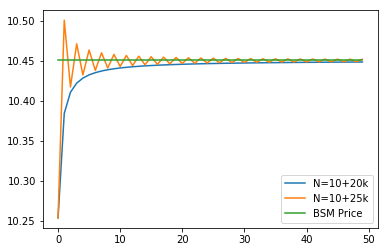

In [70]:
k=np.linspace(0,49,50)
crr_20=[]
crr_25=[]
bsm=[]
for i in range(0,50):
  crr_20.append(CRR(10+20*i))
  crr_25.append(CRR(10+25*i))
  bsm.append(BSM)
plt.plot(k,crr_20)
plt.plot(k,crr_25)
plt.plot(k,bsm)
plt.legend(["N=10+20k", "N=10+25k", "BSM Price"])


From the graph,we can see N=10+20K converges smoothly ,N=10+25K vibrates in a decreasing amplitude but still converge to the BSM price. 